In [1]:
from typing import List, Dict, Any
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from estimator import HousePriceEstimator 

In [2]:
data_frame = pd.read_csv("houses.csv", index_col="Id")
data_frame.head()    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### load and prepare train data records 

In [3]:
data_frame = pd.read_csv("houses.csv", index_col="Id")                 # load cvs file as pandas DataFrame 
prices = data_frame['SalePrice'].values                                # select the SalePrice column as an array
houses = data_frame.to_dict(orient='records')                          # convert house properties to a dictionary (key-value map)
train_houses, test_houses, train_prices, test_prices = train_test_split(houses, prices, test_size=0.10)  

### create and train estimator (model)

In [4]:
estimator = HousePriceEstimator()                                      # instatiate the Estimator (model)
estimator.train(train_houses, train_prices)                            # and train them with the train data set

### predict prices by using test records 

In [5]:
predicted_prices = estimator.predict_prices(test_houses)              # preform prediction by using the test data set

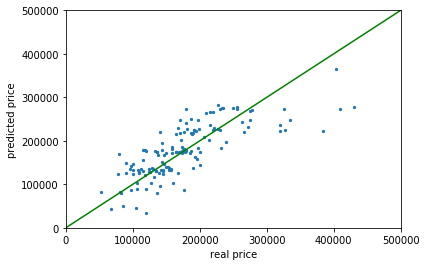

In [6]:
fig, ax = plt.subplots()                                              
ax.set_xlim([0,500000])
ax.set_ylim([0,500000])
ax.scatter(test_prices, predicted_prices, s=5 )
line = mlines.Line2D([0, 1], [0, 1], color='green')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.show()

### store model

In [7]:
estimator.save("estimator.p")

In [8]:
es2 = HousePriceEstimator.load("estimator.p")
es2.predict_prices([test_houses[0]])

array([263876.62875614])

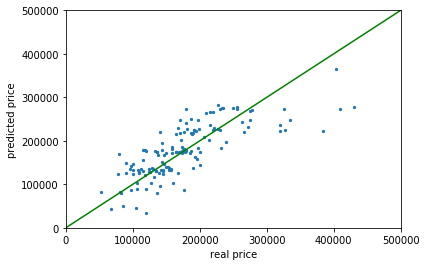

In [9]:
predicted_prices = es2.predict_prices(test_houses)

fig, ax = plt.subplots()
ax.set_xlim([0,500000])
ax.set_ylim([0,500000])
ax.scatter(test_prices, predicted_prices, s=5 )
line = mlines.Line2D([0, 1], [0, 1], color='green')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.show()